In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
data = pd.read_excel("cancer patient data sets.xlsx")
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
#getting the statistical details of our data

data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


C:\Users\Rakesh.DC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


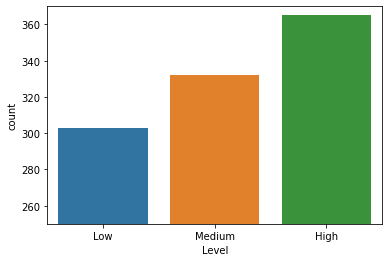

In [ ]:
#analysing target variable using graph to better understand the data
plt.ylim(250,370)
sns.countplot(data.Level)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


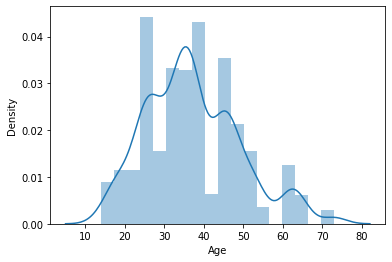

In [ ]:
sns.distplot(data["Age"])

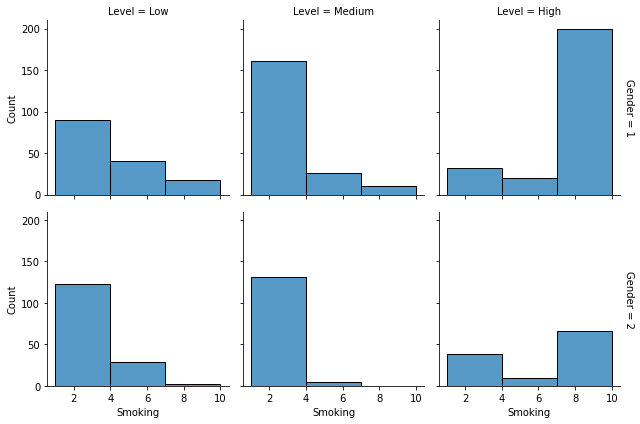

In [ ]:
sns.displot(
      data, x="Smoking", col="Level", row="Gender",
      binwidth=3, height=3, 
      facet_kws=dict(margin_titles=True), # plot the label
)

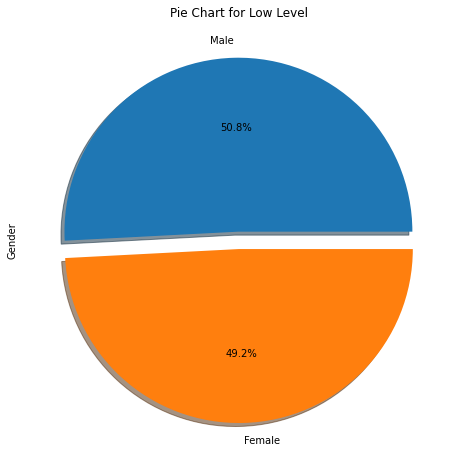

In [ ]:
data.loc[data['Level'] == 'Low']['Gender'].value_counts().plot.pie(labels=['Male','Female'],explode=[0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for Low Level')
plt.show()

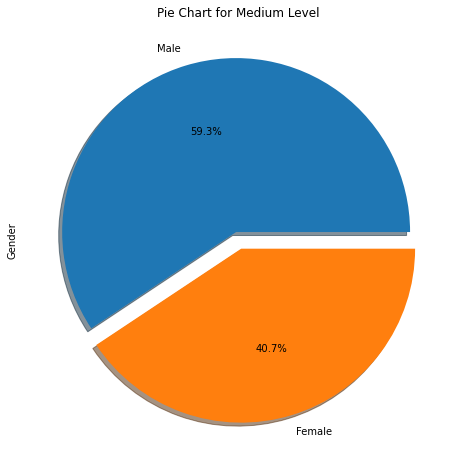

In [ ]:
data.loc[data['Level'] == 'Medium']['Gender'].value_counts().plot.pie(labels=['Male','Female'],explode=[0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for Medium Level')
plt.show()

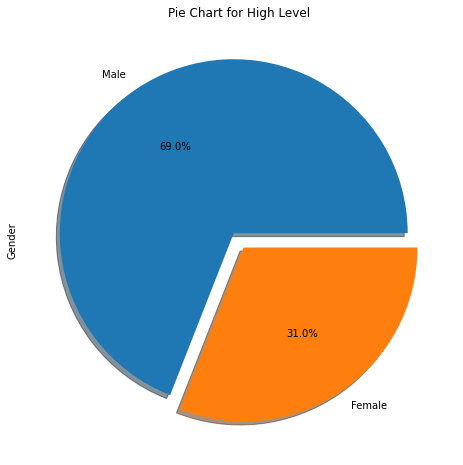

In [ ]:
data.loc[data['Level'] == 'High']['Gender'].value_counts().plot.pie(labels=['Male','Female'],explode=[0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for High Level')
plt.show()

In [1]:
factor = pd.Categorical(data['Level'], categories =['Low', 'Medium', 'High'])

  

data['Level'], definitions = pd.factorize(factor)

Low = data[data.Level == 0].Age
Medium = data[data.Level == 1].Age
High = data[data.Level == 2].Age
data1= [Low, Medium, High]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data1) 

NameError: ignored

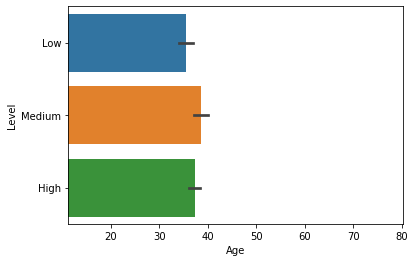

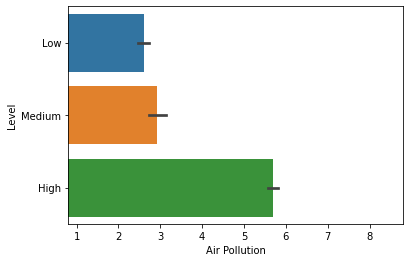

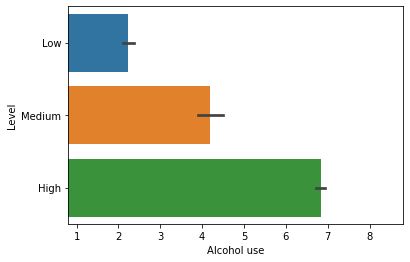

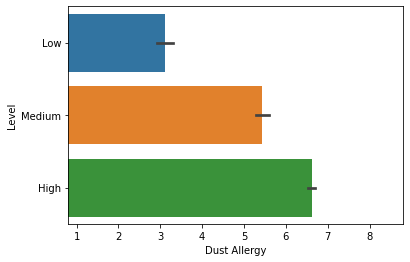

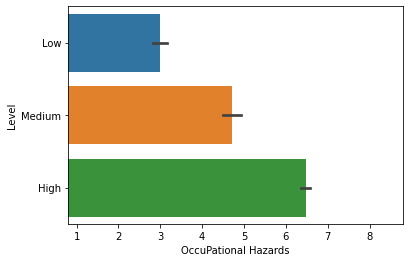

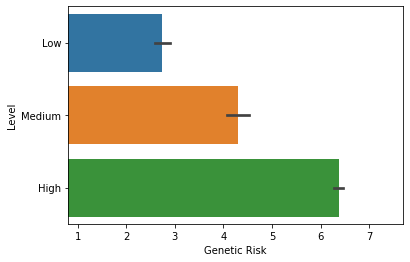

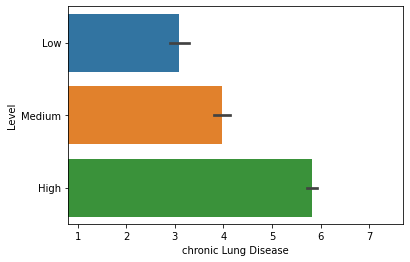

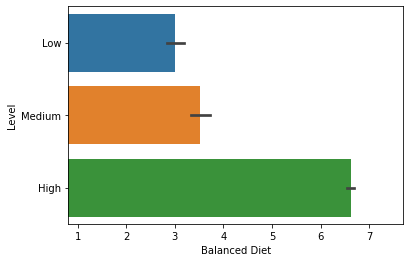

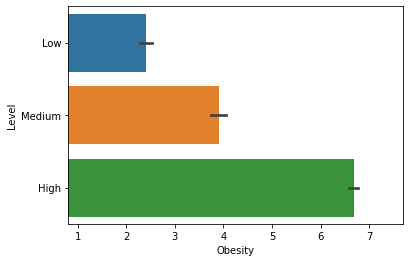

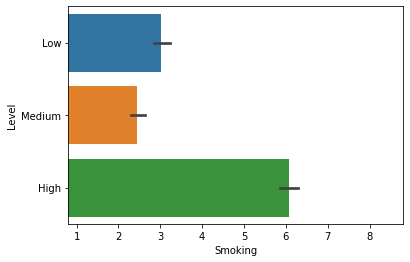

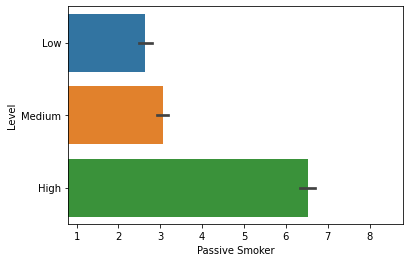

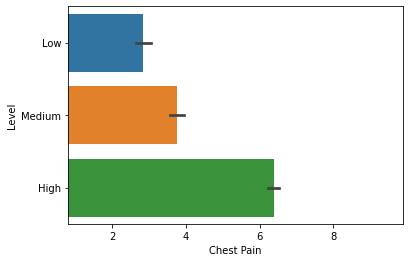

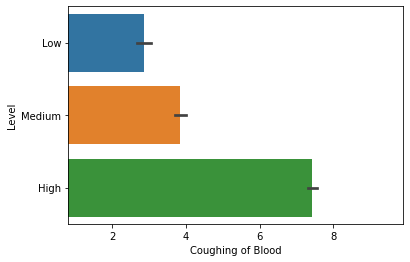

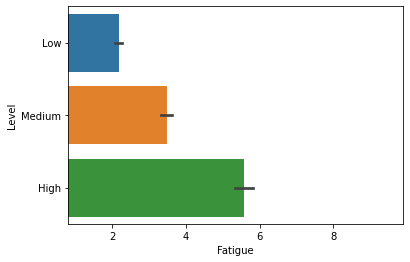

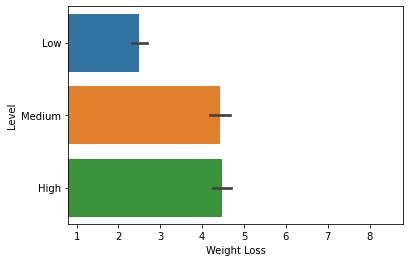

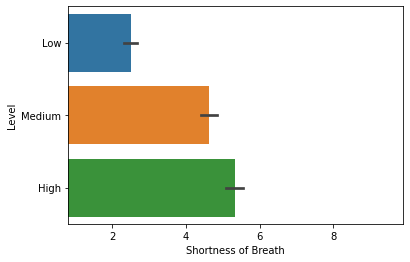

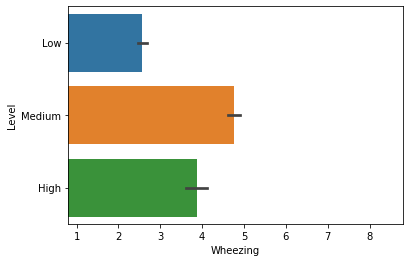

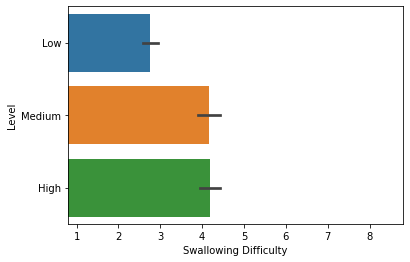

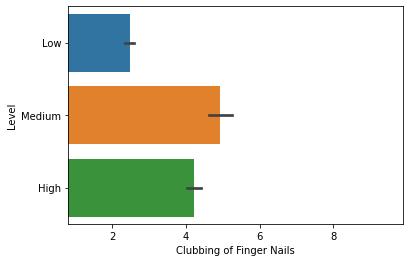

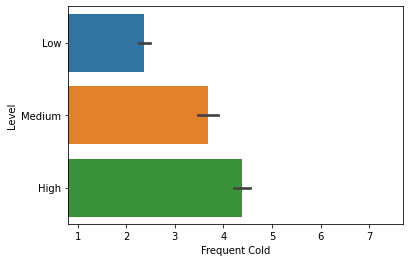

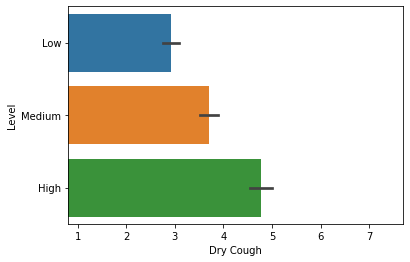

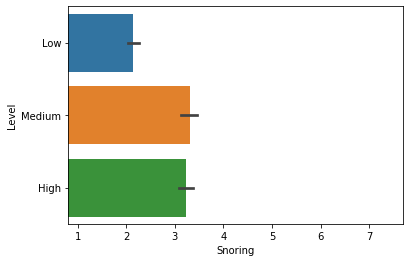

In [ ]:
numeric = [col for col in data.columns if data[col].dtypes != object and col != 'Gender']
for i in numeric:
  plt.xlim(min(data[i])*0.8,max(data[i])*1.1)
  sns.barplot(x = data[i], y = data['Level'], data = data)
  plt.show()

In [ ]:
X = data.iloc[:,1:-1]# indepented variable and droping Patinet ID
y = data.iloc[:,-1]# Target Data

<AxesSubplot:>

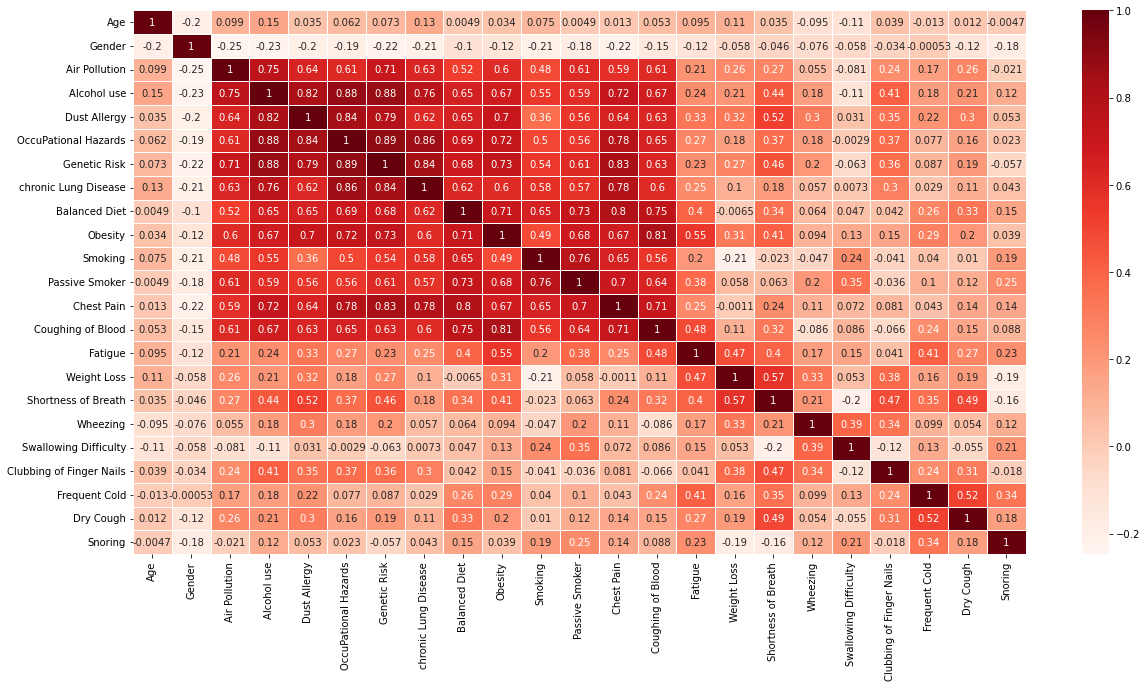

In [ ]:
#Pearson Correlation Matrix Extracting Features

correlationMatrix = data.corr()

plt.figure(figsize = (20,10))
sns.heatmap(correlationMatrix, annot = True, cmap = "Reds", linewidths = 0.5)

1. Perfect: If the value is near ± 1. then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative). 
2. High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. 
3. Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation. 
4. Low degree: When the value lies below ± .29, then it is said to be a small correlation. 
5. No correlation: When the value is zero.

We have eliminated Near to Perfect Correlation.

In [ ]:
# Finding Features with higher correlation value then threshold value
threshold = 0.8

corrFeatures = set()# Correlation Features

#correlationMatrix = data.corr()
for i in range(len(correlationMatrix.columns)):
    for j in range(i):
        if abs(correlationMatrix.iloc[i,j]) >= threshold: # comparing correlation value to threshold value
            corrFeatures.add(correlationMatrix.columns[i])# Adding the Features to the set

In [2]:
sns.set_style("whitegrid")
sns.pairplot(data=data, vars=['Dust Allergy','Coughing of Blood', 'Genetic Risk'])
plt.show()

NameError: ignored

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Balanced Diet,Obesity,Smoking,Passive Smoker,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,2,4,3,2,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,2,2,2,4,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,7,2,3,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,7,7,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,8,7,3,2,4,1,4,2,4,2,3,High


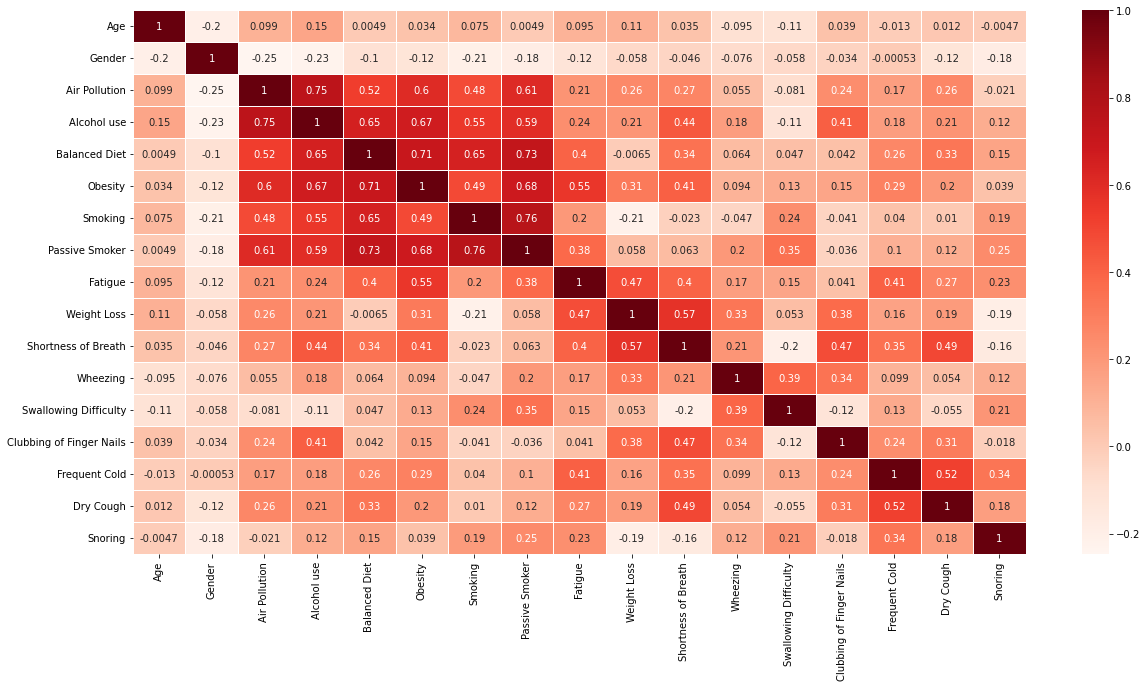

In [ ]:
X_new =  data.drop(corrFeatures, axis = 1)
correlationMatrix = X_new.corr()

plt.figure(figsize = (20,10))
sns.heatmap(correlationMatrix, annot = True, cmap = "Reds", linewidths = 0.5)
X_new.head()

In [ ]:
X_new.drop(['Patient Id'], axis = 1, inplace=True)

In [ ]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Balanced Diet             1000 non-null   int64 
 5   Obesity                   1000 non-null   int64 
 6   Smoking                   1000 non-null   int64 
 7   Passive Smoker            1000 non-null   int64 
 8   Fatigue                   1000 non-null   int64 
 9   Weight Loss               1000 non-null   int64 
 10  Shortness of Breath       1000 non-null   int64 
 11  Wheezing                  1000 non-null   int64 
 12  Swallowing Difficulty     1000 non-null   int64 
 13  Clubbing of Finger Nails  1000 non-null   int64 
 14  Frequent Cold            

In [ ]:
X_new.head()

,Age,Gender,Air Pollution,Alcohol use,Balanced Diet,Obesity,Smoking,Passive Smoker,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,2,4,3,2,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,2,2,2,4,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,7,2,3,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,7,7,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,8,7,3,2,4,1,4,2,4,2,3,High


In [ ]:
#Creating the dependent variable class
factor = pd.Categorical(y, categories =['Low', 'Medium', 'High'])
  
y, definitions = pd.factorize(factor)
#print(y)
#print(definitions)
X_new.drop(['Level'], axis = 1, inplace=True)

In [ ]:
all_results_valid = {}
all_results_test = {}


In [ ]:
#Create training and testing variables by splitting data into 80:20 train:test ratio
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

#Create testing and validation variables by splitting data into 50:50 train:test ratio
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"Total:{X_new.shape}{y.shape}")
print(f"Train:{X_train.shape}{y_train.shape}")
print(f"Test:{X_test.shape}{y_test.shape}")
print(f"Validation:{X_valid.shape}{y_valid.shape}")

Total:(1000, 17)(1000,)
Train:(700, 17)(700,)
Test:(150, 17)(150,)
Validation:(150, 17)(150,)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

# Decission Tree - Leo

In [ ]:
# Decision tree classifier
dtclf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtclf = dtclf.fit(X_train,y_train)
dtc_pred_test = dtclf.predict(X_test)

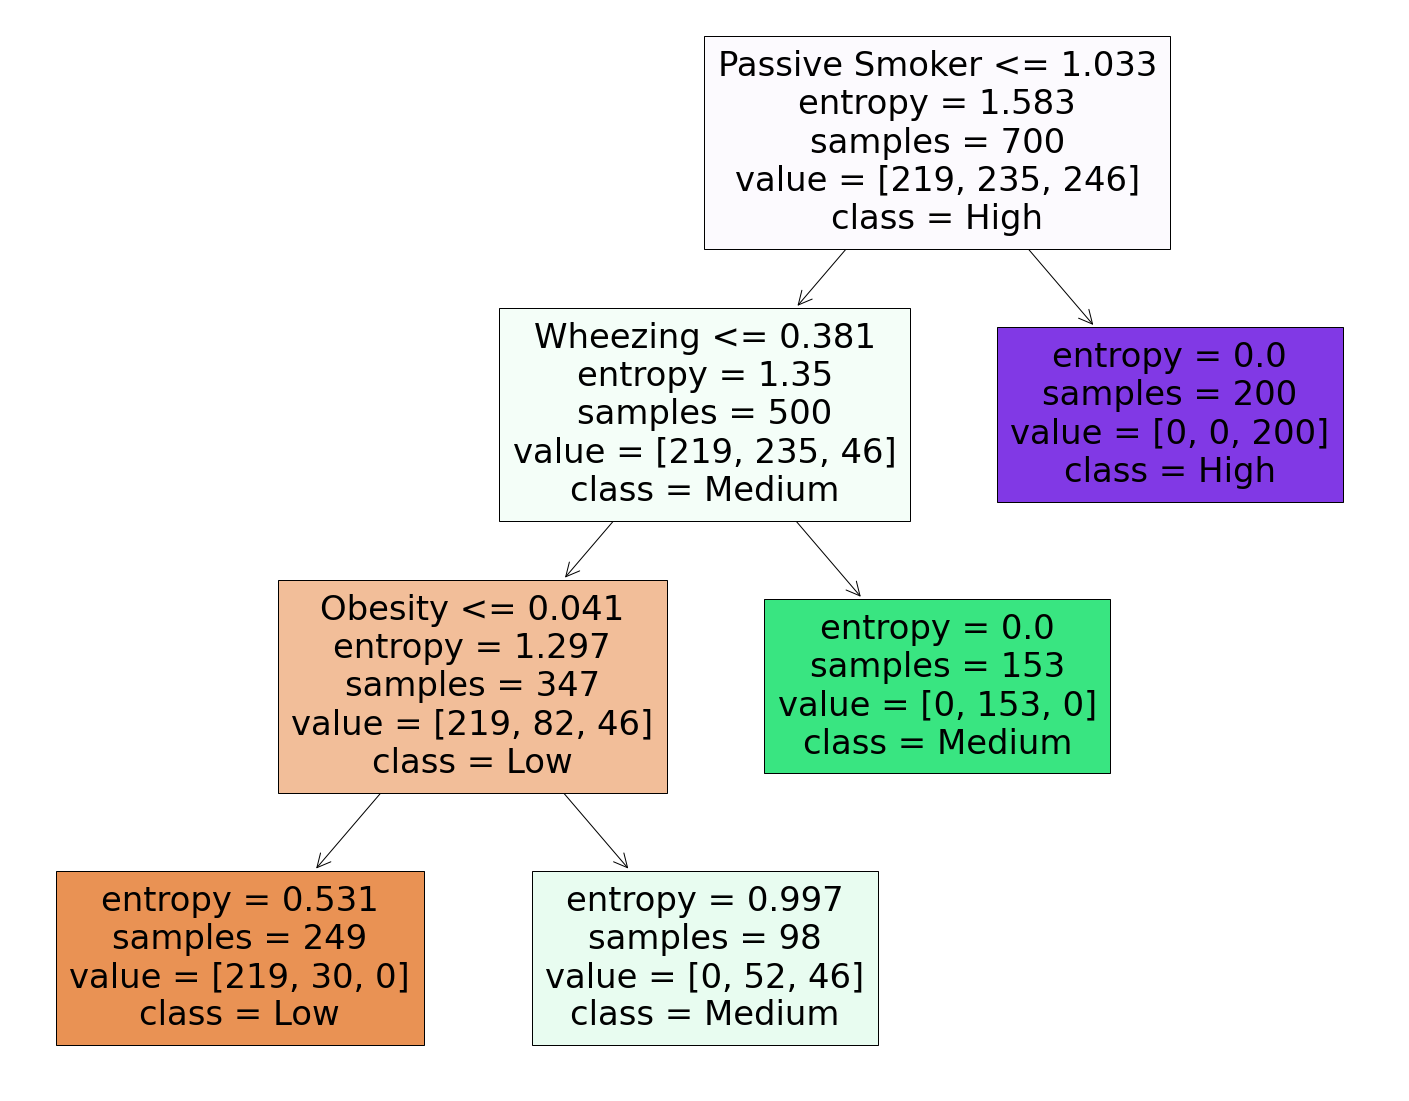

In [ ]:
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(dtclf, 
                   feature_names=X_new.columns,  
                   class_names=['Low','Medium','High'],
                   filled=True)

In [ ]:
print(classification_report(y_test,dtc_pred_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        48
           1       0.81      0.86      0.83        50
           2       1.00      0.81      0.89        52

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



In [ ]:
# Decision tree classifier
dtc_pred = dtclf.predict(X_valid)
print(classification_report(y_valid,dtc_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       0.75      0.91      0.83        47
           2       1.00      0.79      0.88        67

    accuracy                           0.88       150
   macro avg       0.88      0.90      0.89       150
weighted avg       0.90      0.88      0.88       150



In [ ]:
all_results_valid['decision_tree'] = accuracy_score(y_valid, dtc_pred)
all_results_test['decision_tree'] = accuracy_score(y_test, dtc_pred_test)


# Logistics Regression

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.001)
log_reg.fit(X_train,y_train)
log_pred_test = log_reg.predict(X_test)

In [ ]:
print(classification_report(y_test,log_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.98      0.86      0.91        50
           2       0.95      1.00      0.97        52

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



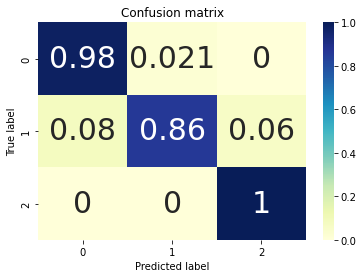

In [ ]:
# Visualizing confusion matrixx

cm = confusion_matrix(y_test,log_pred_test) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
log_pred = log_reg.predict(X_valid)
print(classification_report(y_valid,log_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.93      0.83      0.88        47
           2       0.96      1.00      0.98        67

    accuracy                           0.93       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.93      0.93      0.93       150



In [ ]:
all_results_valid['logistic_regression'] = accuracy_score(y_valid, log_pred)
all_results_test['logistic_regression'] = accuracy_score(y_test, log_pred_test)


# Random Forest - Dhruv

In [ ]:
classifier = RandomForestClassifier(n_estimators=9,  criterion="entropy", max_depth=3)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Reverse factorize
reversefactor = dict(zip(range(3),definitions))
y_test_rf = np.vectorize(reversefactor.get)(y_test)
y_pred_test = np.vectorize(reversefactor.get)(y_pred)

# Making the Confusion Matrix
print(pd.crosstab(y_test_rf, y_pred_test, rownames=['Actual'], colnames=['Predicted']))

Predicted  High  Low  Medium
Actual                      
High         52    0       0
Low           0   46       2
Medium        0    0      50


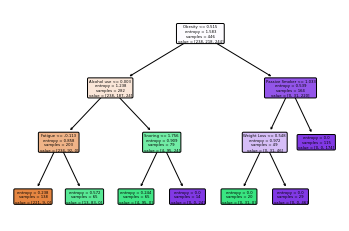

In [ ]:
rf_plot = tree.plot_tree(classifier.estimators_[0],
                feature_names=X_new.columns,
                filled=True,
                rounded=True)

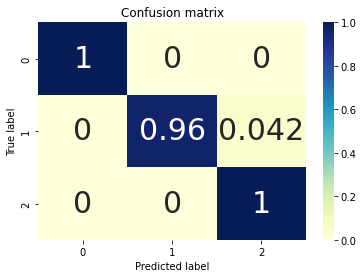

In [ ]:
# Visualizing confusion matrixx

cm = confusion_matrix(y_test_rf,y_pred_test) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = classifier.classes_, title='Confusion matrix')

In [ ]:
print(classification_report(y_test_rf, y_pred_test))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        52
         Low       1.00      0.96      0.98        48
      Medium       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [ ]:
y_pred = classifier.predict(X_valid)
#Reverse factorize
reversefactor = dict(zip(range(3),definitions))
y_valid_rf = np.vectorize(reversefactor.get)(y_valid)
y_pred = np.vectorize(reversefactor.get)(y_pred)
print(classification_report(y_valid_rf,y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        67
         Low       1.00      0.94      0.97        36
      Medium       0.96      1.00      0.98        47

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.98       150
weighted avg       0.99      0.99      0.99       150



In [ ]:
all_results_valid['random_forest'] = accuracy_score(y_valid_rf, y_pred)
all_results_test['random_forest'] = accuracy_score(y_test_rf, y_pred_test)


# KNN - Rakesh

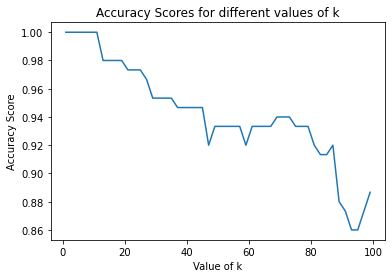

In [ ]:
k_range = list(range(1,100,2)) # odd number from 1 to 100
# def length(X, y):
empty_list = []
for n in k_range:
    #X_train, X_test, y_train, y_test = train_test_split(X, y)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    empty_list.append(accuracy_score(y_test, y_pred_class))
#     return empty_lis

#empty_list =length(X,y)
plt.plot(k_range, empty_list)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

In [ ]:
# a general rule in choosing the value of k is k = sqrt(N)
general_k = int(np.sqrt(X_train.shape[0]))

In [ ]:
# use an even number for K when you have an odd number of classes
# we have 3 class so it should be even number
if general_k % 2 != 0: # odd number
    general_k += 1
print(general_k)

26


In [ ]:
knc = KNeighborsClassifier(n_neighbors = general_k)
knc.fit(X_train, y_train)
Y_knc = knc.predict(X_test)
score_KNC = accuracy_score(y_test, Y_knc)
score_KNC

0.9733333333333334

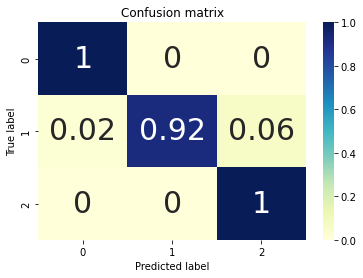

In [ ]:
# Visualizing confusion matrixx

cm = confusion_matrix(y_test,Y_knc) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = knc.classes_, title='Confusion matrix')

In [ ]:
print(classification_report(y_test, Y_knc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.92      0.96        50
           2       0.95      1.00      0.97        52

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
Y_knc = knc.predict(X_valid)
score_KNC = accuracy_score(y_valid, Y_knc)
print(classification_report(y_valid, Y_knc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.94      0.97        47
           2       0.97      1.00      0.99        67

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [ ]:
all_results_valid['KNN'] = accuracy_score(y_valid, Y_knc)
all_results_test['KNN'] = score_KNC

# Gaussian Naive Bayes - Shanuka

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
gnb_predictions_test = gnb.predict(X_test)

In [ ]:
#accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.9533333333333334


In [ ]:
print(classification_report(y_test, gnb_predictions_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.92      0.94      0.93        50
           2       0.94      0.98      0.96        52

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



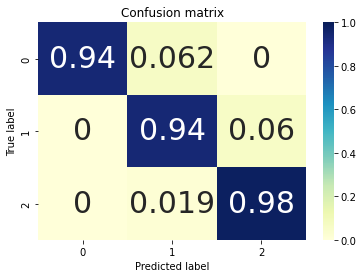

In [ ]:
# Visualizing confusion matrixx

cm = confusion_matrix(y_test,gnb_predictions_test) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = gnb.classes_, title='Confusion matrix')

In [ ]:
gnb_predictions = gnb.predict(X_valid)
print(classification_report(y_valid, gnb_predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        36
           1       0.88      0.94      0.91        47
           2       0.96      0.99      0.97        67

    accuracy                           0.94       150
   macro avg       0.95      0.93      0.93       150
weighted avg       0.94      0.94      0.94       150



In [ ]:
all_results_valid['GaussianNB'] = accuracy_score(y_valid, gnb_predictions)
all_results_test['GaussianNB'] = accuracy_score(y_test, gnb_predictions_test)


# SVM - Chisom

In [ ]:
#Creating the linear kernel

C = 0.001 #C is a hypermeter which is set before the training model and used to control error
svc_model = SVC(kernel='linear', C=C)
svc_model.fit(X_train, y_train)

#Predicting output for test data

svc_y_pred_test = svc_model.predict(X_test)

In [ ]:
print(classification_report(y_test, svc_y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      0.94      0.96        50
           2       0.95      1.00      0.97        52

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



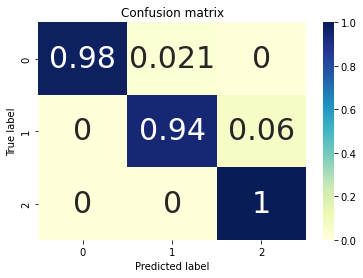

In [ ]:
# Visualizing confusion matrixx

cm = confusion_matrix(y_test,svc_y_pred_test) 
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = svc_model.classes_, title='Confusion matrix')

In [ ]:
svc_y_pred = svc_model.predict(X_valid)
print(classification_report(y_valid, svc_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.94      0.96      0.95        47
           2       0.97      1.00      0.99        67

    accuracy                           0.97       150
   macro avg       0.97      0.96      0.96       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
all_results_valid['SVM'] = accuracy_score(y_valid, svc_y_pred)
all_results_test['SVM'] = accuracy_score(y_test, svc_y_pred_test)
# print(all_results_test)
# print(all_results_valid)


# Algorithim and Evaluation - Comparing all the models

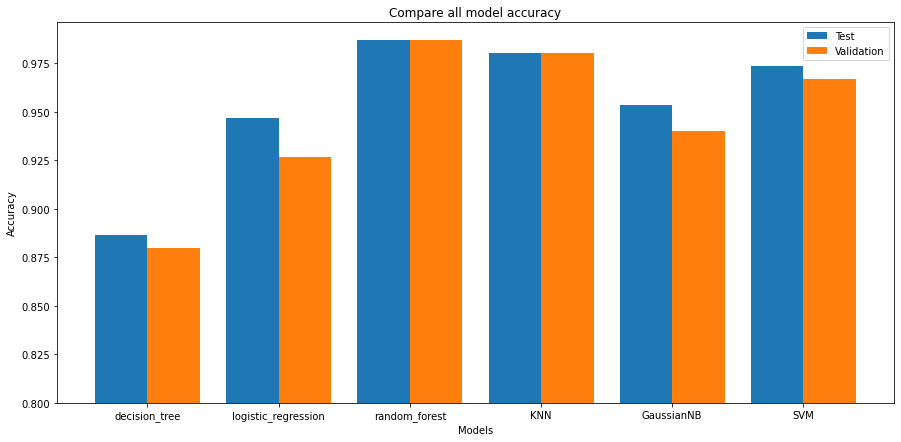

In [ ]:
model = list(all_results_valid.keys())
accuracy = list(all_results_valid.values())
model_test = list(all_results_test.keys())
accuracy_test = list(all_results_test.values())
bottom_bar = 0.8
accuracy = [accuracy_i - bottom_bar for accuracy_i in accuracy]
accuracy_test = [accuracy_test_i - bottom_bar for accuracy_test_i in accuracy_test]

fig = plt.figure(figsize = (15, 7))
X_axis = np.arange(len(model))
  
plt.bar(X_axis - 0.2, accuracy_test, 0.4, bottom=bottom_bar, label = 'Test')
plt.bar(X_axis + 0.2, accuracy, 0.4, bottom=bottom_bar , label = 'Validation')
  
plt.xticks(X_axis, model)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Compare all model accuracy")
plt.legend()
plt.show()
